In [8]:
#goal: I wanted my Capstone project to be about housing prices, as it's a topic I'm deeply interested in. After searching through various
#souces of data such as Kaggle, the U.S Census, and the Bank of Missouri's Federal Economic Data, I ultimately ended up picking a 
#dataset from Kaggle on "California Housing Prices." The main reason why I ended up choosing this dataset over other ones was size: many of the
#other datasets I found were either too small (~200 rows) or absolutely enormous (1,100 columns). This dataset at 20k rows and 10 columns
#felt just the right size. My target variable to predict is the price of a house. 

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [10]:
cal_housing = pd.read_csv(r'C:\Users\mosco\Downloads\archive (8)\housing.csv')

In [12]:
cal_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
cal_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
print(cal_housing['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [15]:
new_cal_housing = pd.get_dummies(cal_housing, columns=['ocean_proximity'], prefix='category')

In [16]:
new_cal_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,category_<1H OCEAN,category_INLAND,category_ISLAND,category_NEAR BAY,category_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [17]:
corr= new_cal_housing.corr()

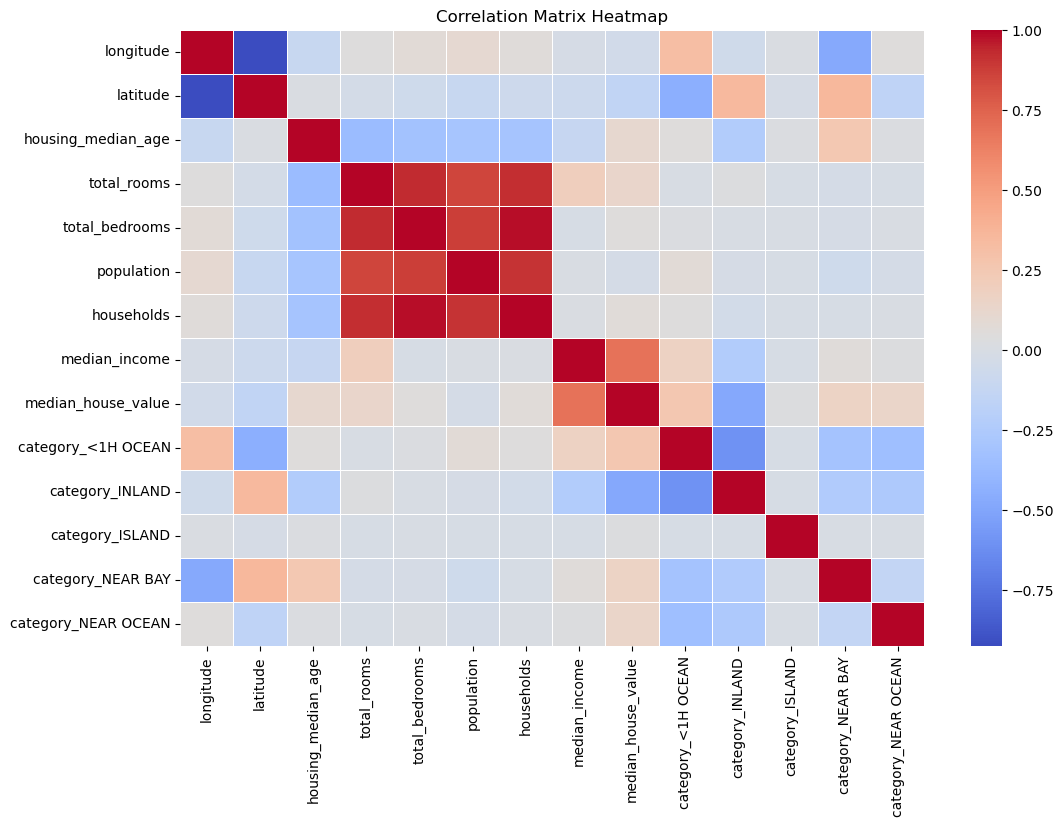

In [18]:
plt.figure(figsize=(12, 8))

sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

In [19]:
## zoom in into 2 big squares of high-correlation

new_housing_3 = new_cal_housing[['total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

In [20]:
new_housing_3.head()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [41]:
new_housing_3 = new_housing_3.sample(frac=1, random_state=42).reset_index(drop=True)

In [42]:
print(new_housing_3.isnull().sum())

total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [43]:
new_housing_3 = new_cal_housing[['total_rooms','population','households','median_income','median_house_value']]

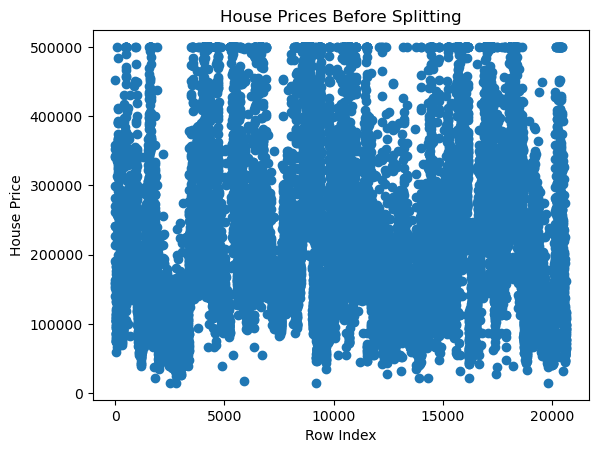

In [44]:
import matplotlib.pyplot as plt

plt.plot(new_housing_3['median_house_value'].values, marker="o", linestyle="")
plt.xlabel("Row Index")
plt.ylabel("House Price")
plt.title("House Prices Before Splitting")
plt.show()


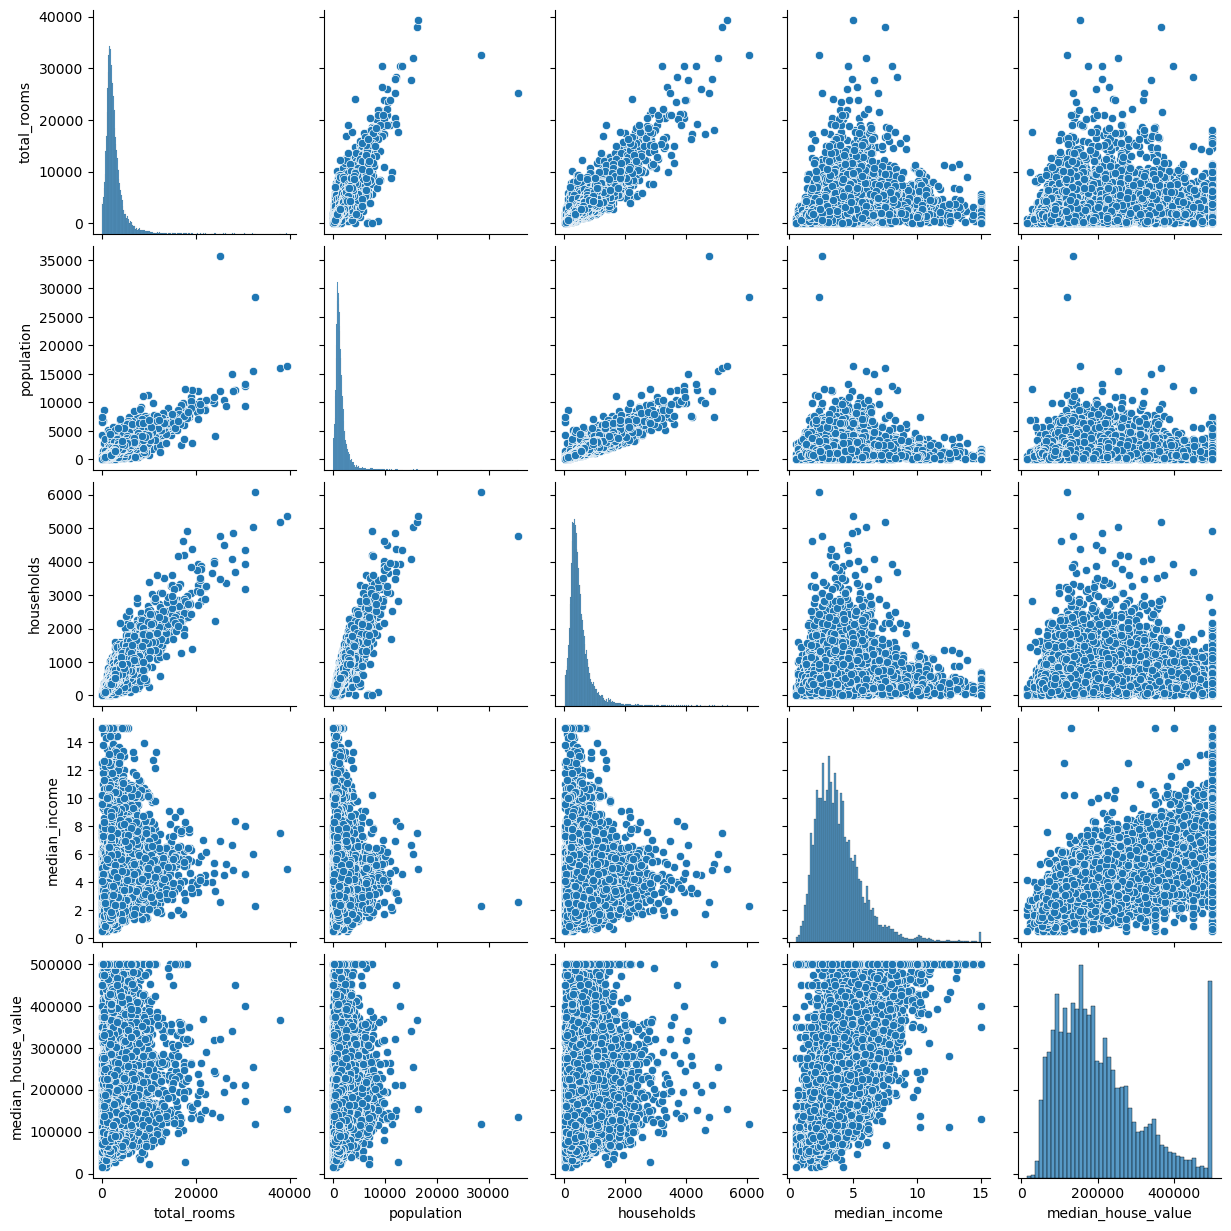

In [45]:
sns.pairplot(new_housing_3)
plt.show()

In [46]:
# idea so far: target variable is housing price. thinking of during a train test split of 60/20/20 then running all columns against the
# target column of housing price. to start lets do a multivariable linear regression and see how how many factors correlate best to the target column

In [47]:
X = new_housing_3.drop(columns=['median_house_value'])  
y = new_housing_3['median_house_value']

In [48]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) #train with 60%, test with 40%

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #further split test into 2 halves

print(f"Train size: {X_train.shape}, Validation size: {X_val.shape}, Test size: {X_test.shape}")

Train size: (12384, 4), Validation size: (4128, 4), Test size: (4128, 4)


In [49]:
model = LinearRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
y_val_pred

array([121912.53738769, 197253.06820584, 223453.41523782, ...,
       185423.92241545, 198903.43669687, 168335.96201069])

In [50]:
# lets check MSE to see how far this was

mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)

print(f"Validation Mean Average Error: {mae:.2f}")
print(f"Validation Mean Square Error: {mse:.2f}")


Validation Mean Average Error: 59345.41
Validation Mean Square Error: 6413674182.64


In [51]:
# lets check which columns affected it the most?

In [52]:
coefficients = model.coef_

feature_importance = pd.DataFrame({'Column': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)

          Column   Coefficient
3  median_income  46140.021962
2     households    231.565164
0    total_rooms    -20.636201
1     population    -39.810508


In [53]:
# Feedback from Assignment 20.1 Capstone Intial Report & Instructor Consultation:

# since I already started with a linear regression, we could try the following:
# 1. Improving the current linear regression (RIDGE, LASSO, Baysian)
# 2. Random Forest Regressor
# 3. SVM Regressor


In [54]:
# Let's review the first model
# lets see what the model looks like

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Feature Names:", X_train.columns.tolist())

Intercept: 23136.60002790313
Coefficients: [-2.06362010e+01 -3.98105076e+01  2.31565164e+02  4.61400220e+04]
Feature Names: ['total_rooms', 'population', 'households', 'median_income']


In [55]:
# thoughts: even before graphing, this doesnt seem right. The model is currently saying that for every additional room,
# the price of the house decreases by $20.64, and that for every additional unit of population, the price of the house
# decreases by $39.81. Neither of these make too much sense, but lets graph it anyway and see what this looks like

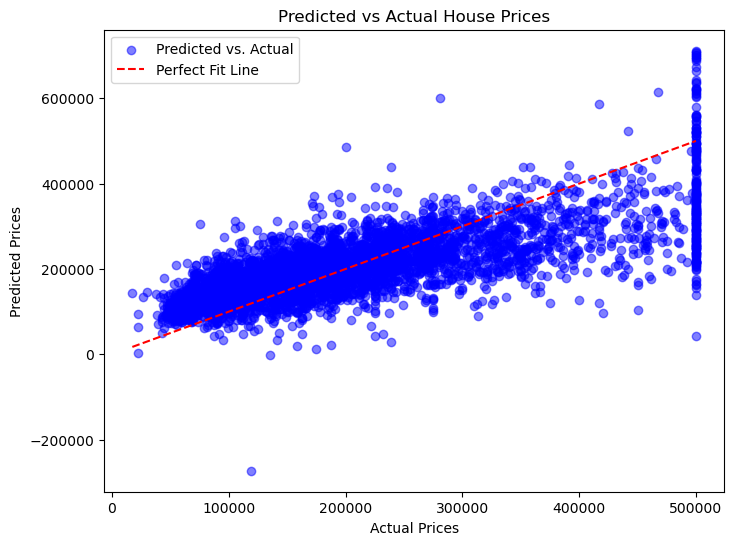

In [56]:
# graphing current model
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Scatter plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicted vs. Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Perfect Fit Line")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.legend()
plt.show()

In [58]:
# Interesting, the graph above actually doesn't look as bad. 
# Let's move to try and improve model.

In [73]:
# Part 1a: Improving Linear Regression with RIDGE
# RIDGE Adds a penalty proportional to the square of the coefficients. RIDGE can be useful When all features contribute to the target variable.

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)  # Let's try different alphas (e.g., 1, 10, 100)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression Score:", ridge.score(X_test, y_test))

Ridge Regression Score: 0.5387999602000499


In [62]:
# We see RIDGE above with alpha 10 gives us a Ridge Regression Score of 0.53879 which means 53.88% of the data can be explained with this model.
# Let's write a for loop to run a few more alphas and see if we can get a better score

alpha_values = [0.1, 1, 10, 50, 100, 500, 1000]

ridge_results = []

# Let's loop through different alpha values and compute score
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train) 
    score = ridge.score(X_test, y_test)  
    ridge_results.append({"Alpha": alpha, "Ridge R² Score": score})

ridge_df = pd.DataFrame(ridge_results)
print(ridge_df)

    Alpha  Ridge R² Score
0     0.1        0.538794
1     1.0        0.538795
2    10.0        0.538800
3    50.0        0.538821
4   100.0        0.538846
5   500.0        0.538969
6  1000.0        0.538946


In [65]:
# Seeing RIDGE results above, our RIDGE score barely moved with wildly different alphas. let's take MSE, MAE and move on to LASSO.

ridge_model = Ridge(alpha=1000).fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)

print(f"Ridge MSE: {ridge_mse:.2f}")
print(f"Ridge MAE: {ridge_mae:.2f}")

Ridge MSE: 6321625043.43
Ridge MAE: 59247.70


In [72]:
# So far, these are our MSEs and MAEs:

# for original multi-variate linear regression model:
# MAE: 59345.41
# MSE: 6413674182.64

# for RIDGE linear regression model:
# Ridge MSE: 6321625043.43
# Ridge MAE: 59247.70

# RIDGE is slightly better.

In [76]:
# Part 1b: Improving Linear Regression with LASSO

# RIDGE was a slightly better model than our original linear regression, let's try LASSO now. 
# LASSO adds a penalty proportional to the absolute values of the coefficients. It can shrink some coefficients completely to zero, 
# effectivly removing features from the model 

from sklearn.linear_model import Lasso

alpha_values = [0.1, 1, 10, 50, 100, 500, 1000]

lasso_results = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)  
    score = lasso.score(X_test, y_test)  
    lasso_results.append({"Alpha": alpha, "Lasso R² Score": score})


lasso_df = pd.DataFrame(lasso_results)
print(lasso_df)

    Alpha  Lasso R² Score
0     0.1        0.538794
1     1.0        0.538795
2    10.0        0.538796
3    50.0        0.538802
4   100.0        0.538809
5   500.0        0.538862
6  1000.0        0.538915


In [77]:
# Our LASSO results are very very close to RIDGE results. Suggests that the original linear regression model was already pretty efficient
# and not able to be improved much with either RIDGE nor LASSO regularization. 

In [81]:
# Part 1c: Improving Linear Regression with Baysian

# Baysian assigns probability to the coefficients instead of coming up with exact values. This means that the model is better fit
# for uncertainty. Let's try it and see it that improves MAE or MSE. 

from sklearn.linear_model import BayesianRidge

bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

y_pred_bayes = bayesian_ridge.predict(X_test)

r2_bayes = bayesian_ridge.score(X_test, y_test)
print(f"Bayesian Ridge R² Score: {r2_bayes:.4f}")

Bayesian Ridge R² Score: 0.5388


In [82]:
# Baysian super close to both LASSO and RIDGE! Seems to point that original linear regression model was already pretty
# efficient, and maybe we should focus on feature engineering instead. 


In [84]:
# Part 2: Trying a Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

print("Random Forest R² Score:", rf_regressor.score(X_test, y_test))

Random Forest R² Score: 0.6008520264381652


In [ ]:
# Seemingly big improvement with Random Forest, as score states 60% of data points can be explained with random forest model, versus 53%
# that could be explained with linear regressions. This is an improvement of ~13% and a good indicator to chase random forest a little more. 
# For now lts try an SVM see how that stacks up before going more into detail with any one model. 

In [85]:
# Part 3: Trying an SVM Regressor

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale features since SVM is sensitive to feature magnitudes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Regressor with RBF Kernel
svm_regressor = SVR(kernel='rbf', C=100, epsilon=0.1)
svm_regressor.fit(X_train_scaled, y_train)

print("SVM R² Score:", svm_regressor.score(X_test_scaled, y_test))


SVM R² Score: 0.2953468976471847


In [ ]:
# SVM regressor performed much worse, explaining only about 29% of the datapoints. At 60%, Random Forest seems like tbe
# best model so we'll focus on making that one better.

In [86]:
# Part 4: Feature Engineering for any One Model
# Model now Random Forest

# Random Forest with existing data for original linear regression model had an R^2 score of 0.6008520264381652 meaning
# ~60% of the data points could be explained with it. Let's see what happens if we add more features.

# Using one-hot-encoder for the "category" column of the original dataset

new_cal_housing #had one-hot encoder features in it

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,category_<1H OCEAN,category_INLAND,category_ISLAND,category_NEAR BAY,category_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [90]:
# let's run random forest on new_cal_housing dataframe

X_2 = new_cal_housing.drop(columns=['median_house_value'])  
y_2 = new_cal_housing['median_house_value']

X_train, X_temp, y_train, y_temp = train_test_split(X_2, y_2, test_size=0.4, random_state=42) #train with 60%, test with 40%

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #further split test into 2 halves

# fill NAs with zero
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)
X_test = X_test.fillna(0)


print(f"Train size: {X_train.shape}, Validation size: {X_val.shape}, Test size: {X_test.shape}")


Train size: (12384, 13), Validation size: (4128, 13), Test size: (4128, 13)


In [91]:

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Evaluate model
print("Random Forest R² Score:", rf_regressor.score(X_test, y_test))

Random Forest R² Score: 0.8142984120176544


In [ ]:
# Random Forest with One-Hot Encoder features greatly improved! Went from explaining ~60% of the data to 81%. Let's plot both models
# against original data to see what they look like. 

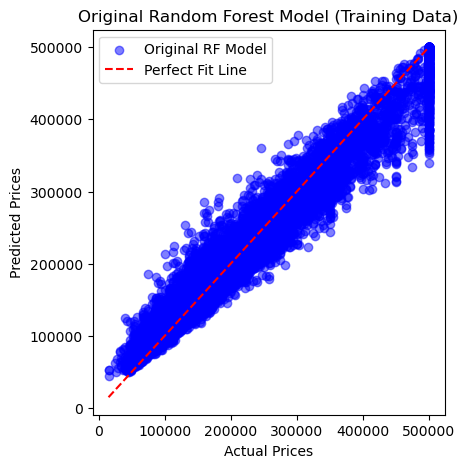

In [94]:
# Plotting original random forest without one-hot-endoder features (R^2 ~ 60%)

X = new_housing_3.drop(columns=['median_house_value'])  
y = new_housing_3['median_house_value']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) #train with 60%, test with 40%

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #further split test into 2 halves


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred_original_train = rf_regressor.predict(X_train)
plt.figure(figsize=(10, 5))


# Original model before one-hot encoding
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_original_train, alpha=0.5, color="blue", label="Original RF Model")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--", label="Perfect Fit Line")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Original Random Forest Model (Training Data)")
plt.legend()

In [97]:
# Calculating error in random forest

y_pred_rf = rf_regressor.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest MAE: {rf_mae:.2f}")


Random Forest MSE: 5472820619.35
Random Forest MAE: 53165.95


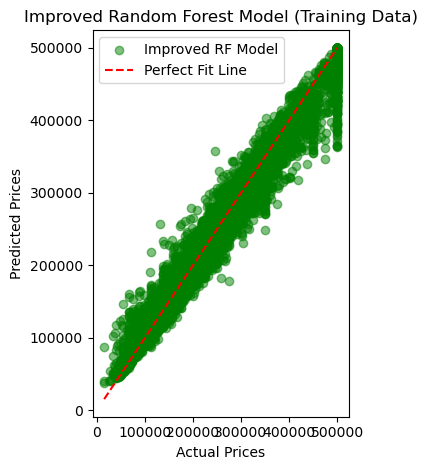

In [101]:
# Plotting improved random forest model with added one-hot-encoder features (R^2 ~ 81%)


X_2 = new_cal_housing.drop(columns=['median_house_value'])  
y_2 = new_cal_housing['median_house_value']

X_train, X_temp, y_train, y_temp = train_test_split(X_2, y_2, test_size=0.4, random_state=42) #train with 60%, test with 40%

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #further split test into 2 halves

# fill NAs with zero
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)
X_test = X_test.fillna(0)

rf_improved = RandomForestRegressor(n_estimators=100, random_state=42)
rf_improved.fit(X_train, y_train)  # Train
y_pred_improved_train = rf_improved.predict(X_train)  # Predict

plt.subplot(1, 2, 2)
plt.scatter(y_train, y_pred_improved_train, alpha=0.5, color="green", label="Improved RF Model")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--", label="Perfect Fit Line")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Improved Random Forest Model (Training Data)")
plt.legend()

plt.tight_layout()
plt.show()

In [105]:
# Calculating error in improved random forest

y_pred_improved_test = rf_improved.predict(X_test) 

rf_mse_test = mean_squared_error(y_test, y_pred_improved_test)
rf_mae_test = mean_absolute_error(y_test, y_pred_improved_test)

y_pred_improved_train = rf_improved.predict(X_train) 
rf_mse_train = mean_squared_error(y_train, y_pred_improved_train)
rf_mae_train = mean_absolute_error(y_train, y_pred_improved_train)

print(f"Training MSE: {rf_mse_train:.2f}, Test MSE: {rf_mse_test:.2f}")
print(f"Training MAE: {rf_mae_train:.2f}, Test MAE: {rf_mae_test:.2f}")


Training MSE: 348608964.82, Test MSE: 2546202278.53
Training MAE: 12112.10, Test MAE: 33163.26


In [108]:
# Comparing Model Performance

model_performance = {
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest (Original)", "Random Forest (Improved)"],
    "MSE": [6413674182.64, 6321625043.43, 5472820619.35, 2546202278.53],
    "MAE": [59345.41, 59247.70, 53165.95, 33163.26]
}

model_comparison_df = pd.DataFrame(model_performance)

print(model_comparison_df)

                      Model           MSE       MAE
0         Linear Regression  6.413674e+09  59345.41
1          Ridge Regression  6.321625e+09  59247.70
2  Random Forest (Original)  5.472821e+09  53165.95
3  Random Forest (Improved)  2.546202e+09  33163.26


In [109]:
# Overall, we see how the MSE nad MAE greatly decreased through the different models. Initially, going from a linear regression
# to a Ridge Regression improved the model but only very slightly. Then going into a random forest, improved it by a lot more.
# Once in a random forst model, feature engineering through the use of one-hot-encoder to create more features improved the model alot more
# leading to a much improved MSE and MAE. 